In [1]:
import warnings
warnings.filterwarnings("ignore")
import sys
import os
from pathlib import Path
sys.path.extend([str(Path(os.getcwd()).parent),str(Path(os.getcwd()).parent.parent)])
ROOT = str(Path(os.getcwd()).parent)
import torchaudio
from project.data_loader.data_loaders import MySoundFolder



In [4]:
items=MySoundFolder(root=str(Path(ROOT,"data","raw_data")),loader=torchaudio.load)

In [5]:
item = items[0]
sample= item[0]
waveform = sample[0]
sample_rate = sample[1]
label =sample[1]

In [6]:
from project.data_loader.transforms import to_mel_spectrogram
spec=to_mel_spectrogram(sample,n_mels=52)
spec.shape

torch.Size([1, 52, 767])

Audio is mono, so 1 channel. Tensor is channel first

let's plot mel spectrogram with intensity in decibels 

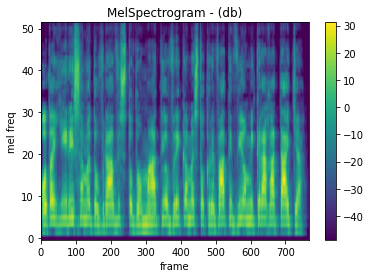

In [7]:
import torch
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import librosa

def plot_spectrogram(spec, title=None, ylabel='freq_bin', aspect='auto', xmax=None):
  fig, axs = plt.subplots(1, 1)
  axs.set_title(title or 'Spectrogram (db)')
  axs.set_ylabel(ylabel)
  axs.set_xlabel('frame')
  im = axs.imshow(librosa.power_to_db(spec), origin='lower', aspect=aspect)
  if xmax:
    axs.set_xlim((0, xmax))
  fig.colorbar(im, ax=axs)
  plt.show(block=False)

plot_spectrogram(spec[0], title="MelSpectrogram - (db)", ylabel='mel freq')

In [8]:
from project.data_loader.transforms import split_into_patches, overlapping_patches

In [9]:
output_from_split = split_into_patches(spec,52)

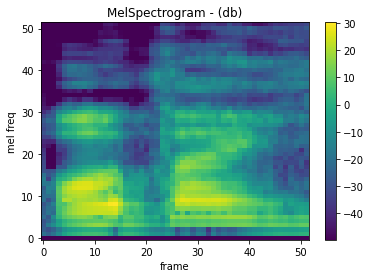

In [10]:
plot_spectrogram(output_from_split[0], title="MelSpectrogram - (db)", ylabel='mel freq')

In [12]:
#output_from_split = overlapping_patches(spec,52)

For each sound file, a tensor is produced. first dimension 

In [15]:
from project.data_loader.transforms import PIPELINES
out = PIPELINES["split"](52,56)(sample)
out.shape

torch.Size([14, 56, 52])

In [18]:
torch.unbind(out)[0].shape

torch.Size([56, 52])

In [63]:
import numpy as np
items=MySoundFolder(root=str(Path(ROOT,"data","raw_data")),loader=torchaudio.load,transform=PIPELINES["split"](52,56))
out = [item[0] for item in items]
out = [torch.unbind(item) for item in out]
out = torch.stack([subitem for subitem in item for item in out]).float().numpy()          
mn=np.mean(out, axis=(0,1,2)) 
st=np.std(out, axis=(0,1,2)) 


In [9]:
from project.data_loader.transforms import pipelines

In [10]:
tr= pipelines("overlapping_from_image", 52,56)

In [11]:
from PIL import Image
from torchvision import transforms
with Image.open(str(Path(ROOT,"data","test","anger","0_anger_1_7d31c24a-8cb1-11eb-8203-b216f6aef6a6.jpg"))) as img:
  print(img.size)
  img_tsr = transforms.ToTensor()(img)
  print(transforms.ToTensor()(img))
  print(tr(img).shape)  
    

(961, 53)
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0039, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.1216],
         [0.0000, 0.0000, 0.0000,  ..., 0.0118, 0.0157, 0.0431],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])
shape : torch.Size([53, 961])
height : 52
width : 56


TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

(961, 53)


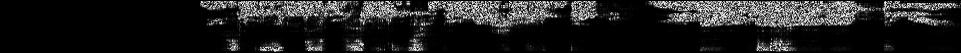

torch.Size([1, 53, 961])


In [7]:
from PIL import Image
from torchvision import transforms
with Image.open(str(Path(ROOT,"data","test","anger","0_anger_1_7d31c24a-8cb1-11eb-8203-b216f6aef6a6.jpg"))) as img:
    print(img.size)
    display(img)
    
    print(transforms.ToTensor()(img).shape)
